In [1]:
import torch
import torch.nn as nn
from torch.nn import functional as F

import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline as bkinl
bkinl.set_matplotlib_formats('svg')

from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

import seaborn as sns

In [2]:
data = __import__('mnist_dataset_loader')

/home/shay/Desktop/HONS/env/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


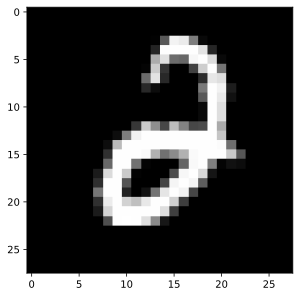

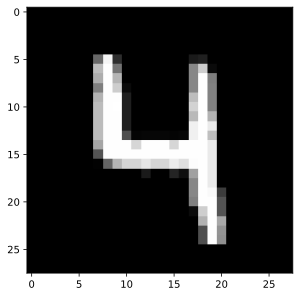

In [3]:
plt.imshow(np.array(next(iter(data.train_dataset))[0]).reshape((28,28)), cmap='gray')
plt.show()

plt.imshow(np.array(next(iter(data.normalised_train_dataset))[0]).reshape((28,28)), cmap='gray')
plt.show()

In [4]:
class AutoEncoder_MNIST(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.input = nn.Linear(784,250)
        self.encoder = nn.Linear(250, 50)
        self.latent = nn.Linear(50, 250)
        self.decoder = nn.Linear(250, 784)
        
    def forward(self, x):
        x = F.relu(self.input(x))
        x = F.relu(self.encoder(x))
        x = F.relu(self.latent(x))
        x = self.decoder(x)
        return torch.sigmoid(x)
    
net = AutoEncoder_MNIST()
loss_fxn = nn.MSELoss()
optmiser = torch.optim.Adam(net.parameters(), lr=0.001)

In [5]:
x = torch.Tensor(data.normalised_wine_data.values)
y_ = net(x[:5, :])
y_.shape, x[:5, :].shape

(torch.Size([5, 784]), torch.Size([5, 784]))

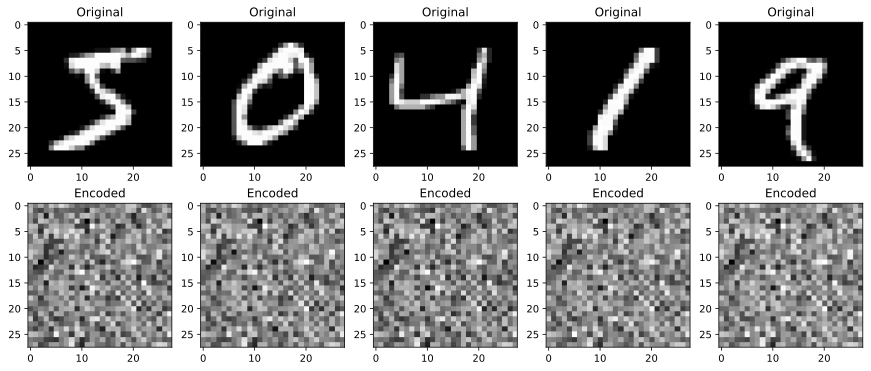

In [6]:
X = x[:5, :]
fig, ax = plt.subplots(2,5, figsize=(15,6))

for i in range(5):
    ax[0,i].imshow(X[i, :].view(28,28).detach(), cmap='gray')
    ax[0,i].set_title("Original")
    ax[1,i].imshow(y_[i, :].view(28,28).detach(), cmap='gray')
    ax[1,i].set_title("Encoded")

plt.show()

In [7]:
epoches = 10001

losses = torch.zeros(epoches)

for epoch in range(epoches):
    if(epoch%20 == 0):
        print(epoch, " ", end="")
    if(epoch%400 == 0):
        print()
    
    # select random set of images ( Set size = 32 )
    random_index = np.random.choice(x.shape[0], size=32)
    X = x[random_index, :]
    
    y_ = net(X)
    loss = loss_fxn(y_, X)
    
    optmiser.zero_grad()
    loss.backward()
    optmiser.step()
    
    losses[epoch] = loss.item()
    

0  


20  40  60  80  100  120  140  160  180  200  220  240  260  280  300  320  340  360  380  400  
420  440  460  480  500  520  540  560  580  600  620  640  660  680  700  720  740  760  780  800  
820  840  860  880  900  920  940  960  980  1000  1020  1040  1060  1080  1100  1120  1140  1160  1180  1200  
1220  1240  1260  1280  1300  1320  1340  1360  1380  1400  1420  1440  1460  1480  1500  1520  1540  1560  1580  1600  
1620  1640  1660  1680  1700  1720  1740  1760  1780  1800  1820  1840  1860  1880  1900  1920  1940  1960  1980  2000  
2020  2040  2060  2080  2100  2120  2140  2160  2180  2200  2220  2240  2260  2280  2300  2320  2340  2360  2380  2400  
2420  2440  2460  2480  2500  2520  2540  2560  2580  2600  2620  2640  2660  2680  2700  2720  2740  2760  2780  2800  
2820  2840  2860  2880  2900  2920  2940  2960  2980  3000  3020  3040  3060  3080  3100  3120  3140  3160  3180  3200  
3220  3240  3260  3280  3300  3320  3340  3360  3380  3400  3420  3440  3460  3480  3

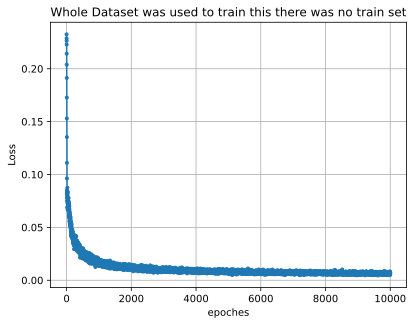

In [8]:
plt.plot(losses, '.-')
plt.xlabel("epoches")
plt.ylabel("Loss")
plt.title("Whole Dataset was used to train this there was no train set")
plt.grid()
plt.show()

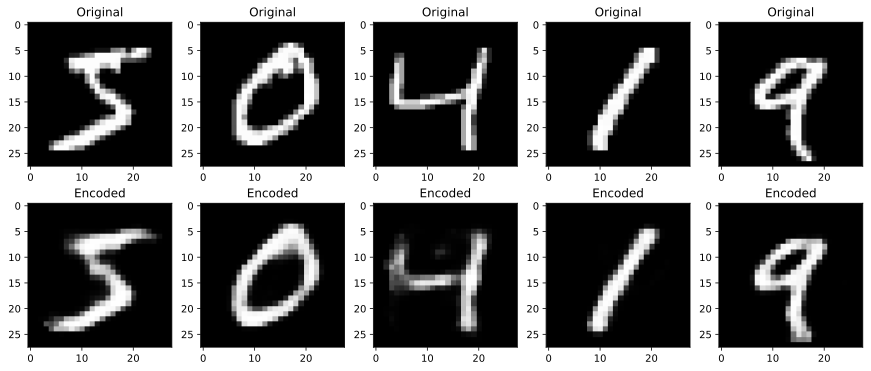

In [9]:
y_ = net(x[:5, :])
# y_.shape, x[:5, :].shape

X = x[:5, :]
fig, ax = plt.subplots(2,5, figsize=(15,6))

for i in range(5):
    ax[0,i].imshow(X[i, :].view(28,28).detach(), cmap='gray')
    ax[0,i].set_title("Original")
    ax[1,i].imshow(y_[i, :].view(28,28).detach(), cmap='gray')
    ax[1,i].set_title("Encoded")

plt.show()